### Tutorial

In [4]:
df = pd.DataFrame({'date':['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04','2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04'], 'fruit':['apple', 'apple', 'apple', 'apple', 'mango', 'mango', 'mango', 'mango'], 'price': [0.80, None, None, 1.20, None, 2.10, 2.00, 1.80]})
df

,date,fruit,price
0,2021-01-01,apple,0.8
1,2021-01-02,apple,NaN
2,2021-01-03,apple,NaN
3,2021-01-04,apple,1.2
4,2021-01-01,mango,NaN
5,2021-01-02,mango,2.1
6,2021-01-03,mango,2.0
7,2021-01-04,mango,1.8


### Filling missing values with constant
Let’s fill the missing prices with a user defined price of 0.85. All the missing values in the price column will be filled with the same value.


In [12]:
df['price'].fillna(value=1.0)
df

# reason?

KeyError: ignored

In [13]:
df['price'].fillna(value=1.0, inplace=True)
df


KeyError: ignored

## Fillna with mean/median
We can fill the missing prices with mean or median price of the entire column.

df.price.mean() and df.price.median() returns the mean (1.975) and median (2.0) prices respectively. The .fillna() method imputes the missing prices with the given mean or median value.

In [23]:
mea = df['price'].mean()
df['price'].fillna(value=mea, inplace= True)
df

KeyError: ignored

## Forward Fill
Forward fill, also known as “ffill” in short, propagates the last valid observation forward along the selected axis of the DataFrame (down the column in our example).



In [ ]:
# df = pd.read_csv('/content/data')
df['price'].fillna(method = 'ffill', inplace = True)
df

,date,fruit,price
0,2021-01-01,apple,0.8
1,2021-01-02,apple,0.8
2,2021-01-03,apple,0.8
3,2021-01-04,apple,1.2
4,2021-01-01,mango,1.2
5,2021-01-02,mango,2.1
6,2021-01-03,mango,2.0
7,2021-01-04,mango,1.8


##### We can limit the number of rows the last valid observation is propagated by using the limit argument. 
##### The below example shows that propagation is limited to only 1 step after the last valid observation. Missing price for apple on 2021-01-03 is not filled as it is 2 steps after the last valid observation.



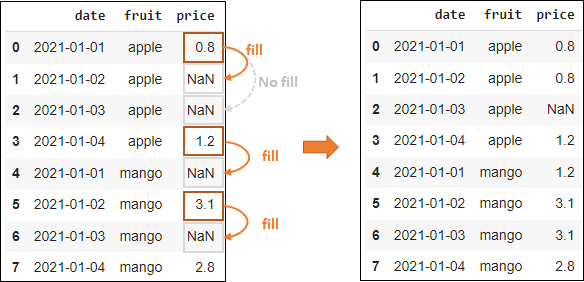

In [ ]:
df['price'].fillna(method = 'ffill', limit = 1, inplace = True)
df

,date,fruit,price
0,2021-01-01,apple,0.8
1,2021-01-02,apple,0.8
2,2021-01-03,apple,NaN
3,2021-01-04,apple,1.2
4,2021-01-01,mango,1.2
5,2021-01-02,mango,2.1
6,2021-01-03,mango,2.0
7,2021-01-04,mango,1.8


### Back Fill
Back fill also known as “bfill” in short is the opposite of forward fill. 
#### The first valid observation after a “NaN” value is identified and propagated backwards along the selected axis (up the column in our example).



In [ ]:
df['price'].fillna(method = 'bfill', inplace = True)

## GroupBy

In [ ]:
technologies   = ({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python","NA"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000,1500],
    'Duration':['30days','50days','55days','40days','60days','35days','30days','50days','40days'],
    'Discount':[1000,2300,1000,1200,2500,None,1400,1600,0]
          })
df = pd.DataFrame(technologies)
print(df)

   Courses    Fee Duration  Discount
0    Spark  22000   30days    1000.0
1  PySpark  25000   50days    2300.0
2   Hadoop  23000   55days    1000.0
3   Python  24000   40days    1200.0
4   Pandas  26000   60days    2500.0
5   Hadoop  25000   35days       NaN
6    Spark  25000   30days    1400.0
7   Python  22000   50days    1600.0
8       NA   1500   40days       0.0


In [ ]:
df['Courses'].value_counts()

Spark      2
Hadoop     2
Python     2
PySpark    1
Pandas     1
NA         1
Name: Courses, dtype: int64

In [ ]:
gr =df.groupby(by='Courses')

In [ ]:
gr.get_group('Hadoop')

,Courses,Fee,Duration,Discount
2,Hadoop,23000,55days,1000.0
5,Hadoop,25000,35days,NaN


### Ploting

In [90]:
plo = pd.read_csv('plot.csv')
plo

FileNotFoundError: ignored

In [89]:
from matplotlib import pyplot as plt

## Scatter plot
using this dataset plot scatter plot between 'Un-employment rate and index price'

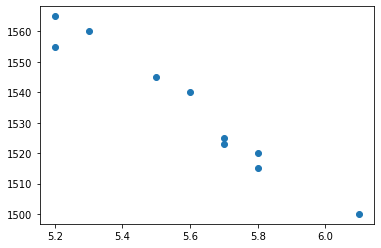

In [ ]:
plt.scatter(plo['unemployment_rate'],plo['index_price'])

### Line graph
plot line graph between 'years' and 'un-employment rate'

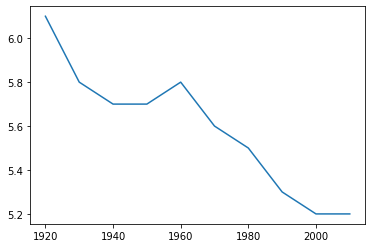

In [ ]:
plt.plot(plo['year'],plo['unemployment_rate'])

### Bar chart
create bar chart between 'years' and 'un-emploemnt rate'

<BarContainer object of 10 artists>

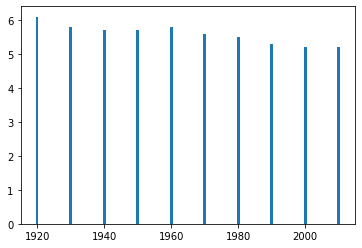

In [ ]:
plt.bar(plo['year'],plo['unemployment_rate'])

## Tasks:

Task 1
load provided dataset (data_1)


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Lab 13/data_1.csv')
print(df1)


     customer_id  year_of_birth  educational_level marital_status  \
0       20201701            1982        Graduation         Single   
1       20201702            1950        Graduation        Married   
2       20201703            1965        Graduation       Divorced   
3       20201704            1984        Graduation   Relationship   
4       20201705            1981               PhD        Widowed   
..           ...             ...               ...            ...   
494     20202195            1944               PhD       Divorced   
495     20202196            1962            Master       Divorced   
496     20202197            1978        Graduation       Divorced   
497     20202198            1971               PhD   Relationship   
498     20202199            1949               PhD   Relationship   

     annual_income purhcase_date  recency  online_purchases  store_purchases  \
0          58138.0      9/4/2012       58                 8                4   
1          

Task 2:
check for missing columns/values in this dataset

In [6]:
df1.isnull().any()

customer_id          False
year_of_birth        False
educational_level    False
marital_status       False
annual_income         True
purhcase_date        False
recency              False
online_purchases     False
store_purchases      False
complaints           False
calls                False
intercoms            False
dtype: bool

Task 3: create a filter to show data(rows) which contains any missing values in it

In [110]:
filt = df1.isnull()
show = df1[filt]
show


,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Task 4: fill the missing value if any with any constant number

In [112]:
df1['annual_income'].fillna(value=1.0)
print(df1)


     customer_id  year_of_birth  educational_level marital_status  \
0       20201701            1982        Graduation         Single   
1       20201702            1950        Graduation        Married   
2       20201703            1965        Graduation       Divorced   
3       20201704            1984        Graduation   Relationship   
4       20201705            1981               PhD        Widowed   
..           ...             ...               ...            ...   
494     20202195            1944               PhD       Divorced   
495     20202196            1962            Master       Divorced   
496     20202197            1978        Graduation       Divorced   
497     20202198            1971               PhD   Relationship   
498     20202199            1949               PhD   Relationship   

     annual_income purhcase_date  recency  online_purchases  store_purchases  \
0          58138.0      9/4/2012       58                 8                4   
1          

Task 5: Load the dataset again into some dataframe eg.. df2. and calculate the medain of data which contain missing values in it


In [56]:
df2 = pd.read_csv('/content/drive/MyDrive/Lab 13/data_1.csv')
print(df2)


     customer_id  year_of_birth  educational_level marital_status  \
0       20201701            1982        Graduation         Single   
1       20201702            1950        Graduation        Married   
2       20201703            1965        Graduation       Divorced   
3       20201704            1984        Graduation   Relationship   
4       20201705            1981               PhD        Widowed   
..           ...             ...               ...            ...   
494     20202195            1944               PhD       Divorced   
495     20202196            1962            Master       Divorced   
496     20202197            1978        Graduation       Divorced   
497     20202198            1971               PhD   Relationship   
498     20202199            1949               PhD   Relationship   

     annual_income purhcase_date  recency  online_purchases  store_purchases  \
0          58138.0      9/4/2012       58                 8                4   
1          

In [113]:
med=df2['annual_income'].median()
print(med)

50841.5


Task 6: now replace the msssing values with the median of that particular column which contain missing enteries

In [114]:
med = df2.median()
df2['annual_income'].fillna(value=med, inplace= True)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,customer_id,year_of_birth,educational_level,marital_status,annual_income,purhcase_date,recency,online_purchases,store_purchases,complaints,calls,intercoms
0,20201701,1982,Graduation,Single,58138.0,9/4/2012,58,8,4,0,3,11
1,20201702,1950,Graduation,Married,46344.0,3/8/2014,38,1,2,0,3,11
2,20201703,1965,Graduation,Divorced,71613.0,8/21/2013,26,8,10,0,3,11
3,20201704,1984,Graduation,Relationship,26646.0,2/10/2014,26,2,4,0,3,11
4,20201705,1981,PhD,Widowed,58293.0,1/19/2014,94,5,6,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...
494,20202195,1944,PhD,Divorced,55614.0,11/27/2013,85,9,6,0,3,11
495,20202196,1962,Master,Divorced,59432.0,4/13/2013,88,5,11,0,3,11
496,20202197,1978,Graduation,Divorced,55563.0,4/5/2014,22,2,3,0,3,11
497,20202198,1971,PhD,Relationship,43624.0,4/21/2013,83,4,4,0,6,11


TAsk 7: reload the data into new dataframe and use fillna function with ffill method to propagate the values to next 2 null entries.

In [115]:
df3 = pd.read_csv('/content/drive/MyDrive/Lab 13/data_1.csv')
df3['annual_income'].fillna(method = 'ffill', inplace = True)
print(df3)


     customer_id  year_of_birth  educational_level marital_status  \
0       20201701            1982        Graduation         Single   
1       20201702            1950        Graduation        Married   
2       20201703            1965        Graduation       Divorced   
3       20201704            1984        Graduation   Relationship   
4       20201705            1981               PhD        Widowed   
..           ...             ...               ...            ...   
494     20202195            1944               PhD       Divorced   
495     20202196            1962            Master       Divorced   
496     20202197            1978        Graduation       Divorced   
497     20202198            1971               PhD   Relationship   
498     20202199            1949               PhD   Relationship   

     annual_income purhcase_date  recency  online_purchases  store_purchases  \
0          58138.0      9/4/2012       58                 8                4   
1          

Task 8: load data_2 and fill missing value in salary column with average

In [102]:
df4 = pd.read_csv('/content/drive/MyDrive/Lab 13/data_2.csv')
print(df4)

              Name            Team  Number Position   Age Height  Weight  \
0    Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1      Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2     John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3      R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4    Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   
..             ...             ...     ...      ...   ...    ...     ...   
453   Shelvin Mack       Utah Jazz     8.0       PG  26.0    6-3   203.0   
454      Raul Neto       Utah Jazz    25.0       PG  24.0    6-1   179.0   
455   Tibor Pleiss       Utah Jazz    21.0        C  26.0    7-3   256.0   
456    Jeff Withey       Utah Jazz    24.0        C  26.0    7-0   231.0   
457            NaN             NaN     NaN      NaN   NaN    NaN     NaN   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [98]:
avg= df4.mean()
df4['Salary'].isnull().fillna(value=avg, inplace= True)
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


Task 9: grouping the data such that to show records of team 'Boston Celtics'

In [94]:
gr =df4.groupby(by='Team')
gr.get_group('Boston Celtics')


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


Task 10: Using groupby() create grups of more than one category ie team and college in one group

In [86]:
multigroup=df4.groupby(['Team','College'])
multigroup


Task 11: Draw scatter plot between the 'players' and their 'Age' taking age on x-axis

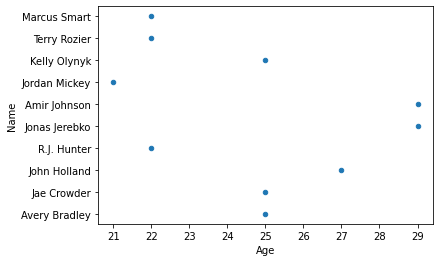

In [111]:
df4[:10].plot.scatter(x = 'Age', y = 'Name')

Task 11b: to see the agging effect of players, Draw the line plot between age and weight

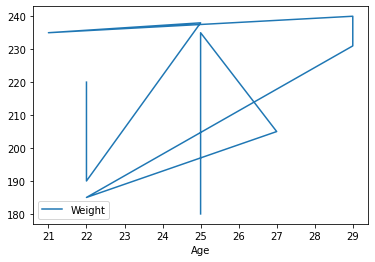

In [103]:
df4[:10].plot.line(x = 'Age', y = 'Weight')

Task 11c: draw the bar plot between weight and age of players, taking age on x-axis.


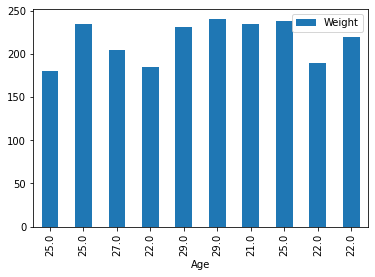

In [104]:
df4[:10].plot.bar(x = 'Age', y = 'Weight')

Task 11d: what results you infer from task 11c, also state the reason

In [105]:
#the heavy players are of age 29.